In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

sns.set(
    context='talk',
    style='whitegrid',
    palette='deep',
    font='sans-serif',
    rc={'figure.figsize': (10, 6), 'axes.grid': True},
)

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Data Analysis Projects/Project 3/NetFlix.csv')

In [4]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.shape

(7789, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


**Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.**

In [7]:
print(f"There are {df.duplicated().sum()} duplicate records among {df.shape[0]} records.")

There are 2 duplicate records among 7789 records.


In [8]:
df=df.drop_duplicates()

print(f"There are {df.duplicated().sum()} duplicate records.")

There are 0 duplicate records.


In [9]:
df.shape

(7787, 11)

**Task. 2) Is there any Null Value present in any column ? Show with Heat-map.**

In [10]:
print(f"{df.isnull().sum()}\n")
print(f"There are {df.isnull().sum().sum()} null values in the dataset.")

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

There are 3630 null values in the dataset.


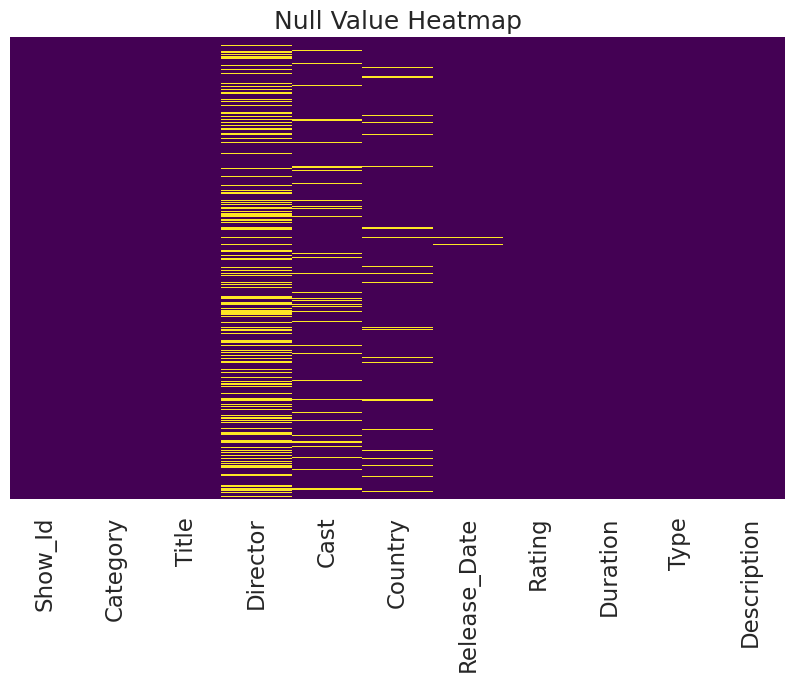

In [11]:
null_values=df.isnull()
sns.heatmap(null_values, cmap='viridis', cbar=False, yticklabels=False)
plt.title("Null Value Heatmap")
plt.show()

**Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show**

In [12]:
df.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [13]:
df[df['Title'] == 'House of Cards'][['Show_Id', 'Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


**Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.**

In [14]:
df['Release_Date']=pd.to_datetime(df['Release_Date'].str.strip(), format="%B %d, %Y", errors='coerce')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [15]:
len(df), len(df.Show_Id.unique())

(7787, 7787)

In [16]:
df['Release_Date'].dt.year.astype('Int64').value_counts()

,count
Release_Date,
2019,2153
2020,2009
2018,1685
2017,1225
2016,443
2021,117
2015,88
2014,25
2011,13


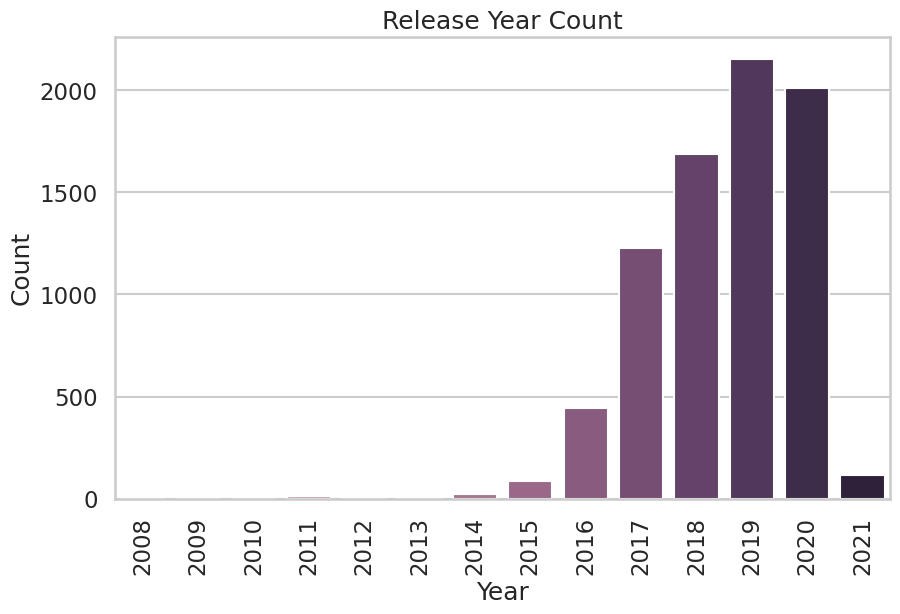

In [17]:
year_counts = df['Release_Date'].dt.year.astype('Int64').value_counts().sort_index()

sns.barplot(x=year_counts.index, y=year_counts.values, hue=year_counts.index, legend=False)
plt.title("Release Year Count")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

**Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.**

In [18]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


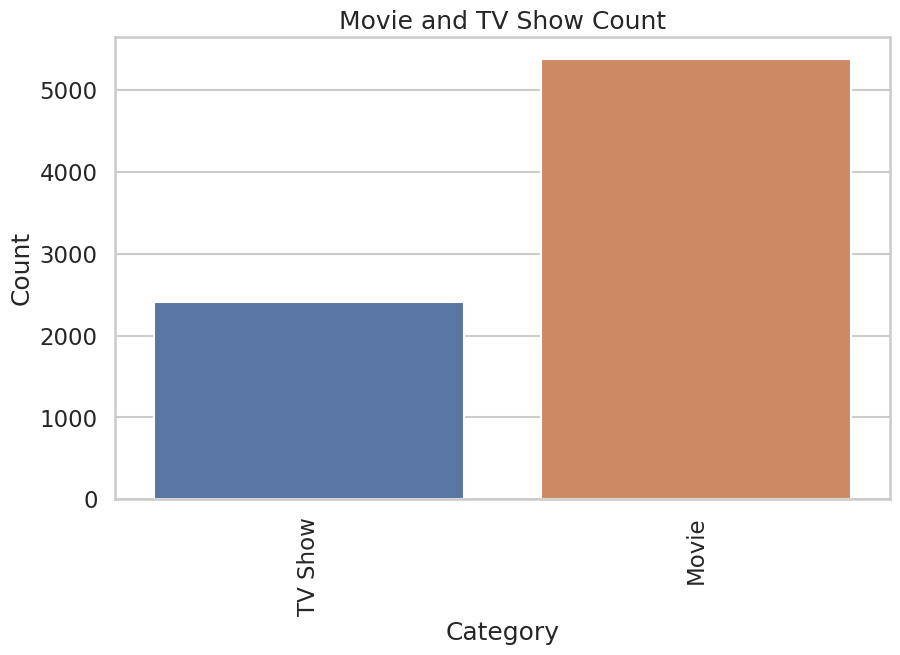

In [19]:
sns.countplot(data=df, x='Category', hue='Category')
plt.title("Movie and TV Show Count")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

**Q. 4) Show all the Movies that were released in year 2000**

In [20]:
df['Year']=df['Release_Date'].dt.year.astype('Int64')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [21]:
movies_2000=df[df['Year'] == 2000]
movies_2000=df[df['Category'] == 'Movie']
print(movies_2000.Title.unique())

['07:19' '23:59' '9' ... 'Zubaan' 'Zulu Man in Japan'
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]


**Q. 5) Show only the Titles of all TV Shows that were released in India only.**

In [28]:
movies_india=df[df['Country'].isin(['India'])]
list(movies_india['Title'].unique())

['706',
 '1920',
 '15-Aug',
 '\u200b\u200bKuch Bheege Alfaaz',
 '\u200bGoli Soda 2',
 '\u200bMaj Rati \u200b\u200bKeteki',
 '\u200bMayurakshi',
 '1000 Rupee Note',
 '2 States',
 '21 Sarfarosh: Saragarhi 1897',
 '25 Kille',
 '3 Idiots',
 '6-5=2',
 '7 (Seven)',
 '7 Khoon Maaf',
 '90 ML',
 'A Billion Colour Story',
 'A Flying Jatt',
 'A Scandall',
 'A truthful Mother',
 'A Wednesday',
 'Aadu 2',
 'Aagey Se Right',
 'Aajcha Divas Majha',
 'Aakhri Adaalat',
 'Aalorukkam',
 'Aamir',
 'Aapla Manus',
 'Aarakshan',
 'Aashayein',
 'Aashik Awara',
 'Aata Pita',
 'Aaviri',
 'Abby Sen',
 'ABCD 2',
 'ABCD: Any Body Can Dance',
 'Abhinetri',
 'Action Replayy',
 'Adhugo',
 "Aditi Mittal: Things They Wouldn't Let Me Say",
 'Adrishya',
 'Agent Raghav',
 'Agneepath',
 'Agyaat',
 'Ahista Ahista',
 'Aisa Yeh Jahaan',
 'Aitraaz',
 'Aiyaary',
 'Aiyyaa',
 'Ajab Prem Ki Ghazab Kahani',
 'Ajji',
 'AK vs AK',
 'Akbar\xa0Birbal',
 'Ala Vaikunthapurramuloo',
 'Albert Pinto Ko Gussa Kyun Aata Hai?',
 'Amar Akbar An

**Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix?**

In [29]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [36]:
df.groupby(['Director', 'Category'])['Category'].count().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)

,Director,Category,Count
3103,"Raúl Campos, Jan Suter",Movie,18
2337,Marcus Raboy,Movie,15
1618,Jay Karas,Movie,14
627,Cathy Garcia-Molina,Movie,13
1615,Jay Chapman,Movie,12
4044,Youssef Chahine,Movie,12
2406,Martin Scorsese,Movie,12
3630,Steven Spielberg,Movie,10
882,David Dhawan,Movie,9
3475,Shannon Hartman,Movie,8


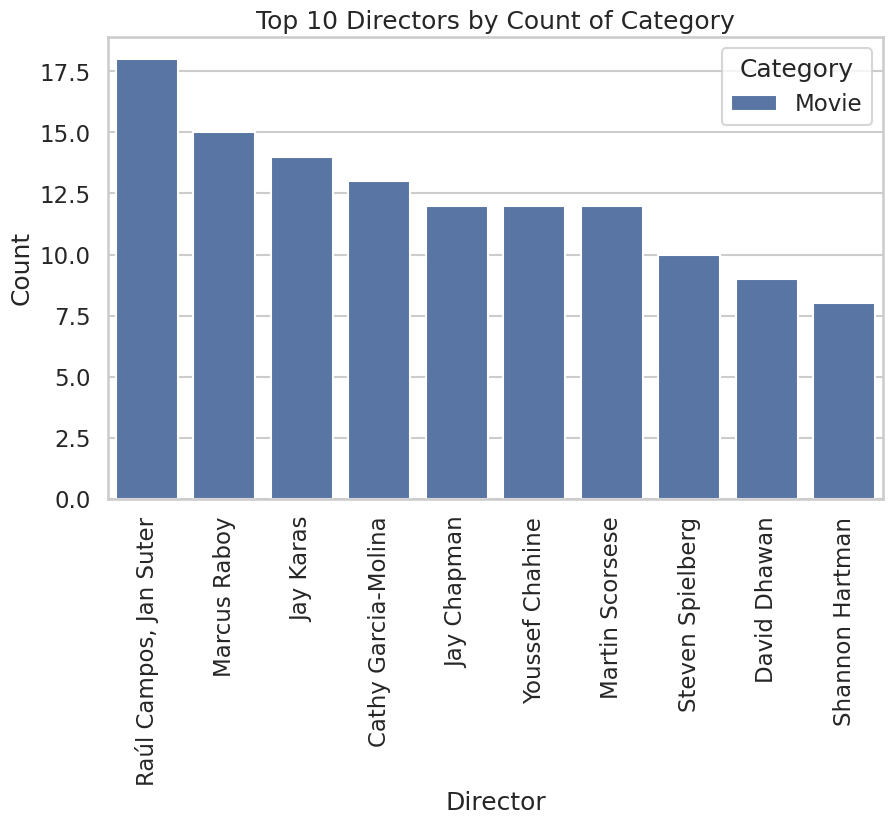

In [34]:
top10_directors_category=df.groupby(['Director', 'Category'])['Category'].count().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)

#plt.figure(figsize=(10, 6))
sns.barplot(data=top10_directors_category, x='Director', y='Count', hue='Category')
plt.title("Top 10 Directors by Count of Category")
plt.xlabel("Director")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

**Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".**

In [38]:
len(df[df['Type'] == 'Comedies'])

97

In [40]:
df[((df['Category'] == 'Movie') & (df['Type'] == 'Comedies')) | (df['Country'] == 'United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,2019-11-01,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,2017-08-01,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,2017-12-31,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017


**Q. 8) In how many movies/shows, Tom Cruise was cast?**

In [42]:
print(f"There are {len(df['Cast'].str.contains('Tom Cruise', case=False, na=False))} movies/shows where Tom Cruise were cast")

There are 7787 movies/shows where Tom Cruise were cast


**Q. 9) What are the different Ratings defined by Netflix ?**

In [43]:
print(list(df.Rating.unique()))

['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan, 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR']


**Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?**

In [45]:
movie_canada=df[df['Country'] == 'Canada']
movie_canada=movie_canada[movie_canada['Category'] == 'Movie']
print(f"There are {len(movie_canada[movie_canada['Rating'] == 'TV-14'])} movies got the 'TV-14' rating in Canada")

There are 11 movies got the 'TV-14' rating in Canada


**Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?**

In [46]:
movie_after_2018=df[df['Year'] > 2018]
movie_after_2018=movie_after_2018[movie_after_2018['Category'] == 'TV Show']
print(f"There are {len(movie_after_2018[movie_after_2018['Rating'] == 'R'])} TV Shows got the 'R' rating after year 2018")

There are 1 TV Shows got the 'R' rating after year 2018


**Q. 10) What is the maximum duration of a Movie/Show on Netflix ?**

In [48]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016


In [51]:
df['Duration'].value_counts().sort_index().head(1)

,count
Duration,
1 Season,1608


**Q. 11) Which individual country has the Highest No. of TV Shows ?**

In [54]:
tv_shows=df[df['Category'] == 'TV Show']

print(tv_shows.groupby('Country')['Title'].count().sort_values(ascending=False).head(1))

Country
United States    705
Name: Title, dtype: int64


**Q. 12) How can we sort the dataset by Year ?**

In [55]:
df.sort_values(by='Year')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010
...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,<NA>
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",<NA>
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",<NA>
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",<NA>


**Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.**

In [56]:
df[((df['Category'] == 'Movie') & (df['Type'] == 'Dramas')) | ((df['Category'] == 'TV Show') & (df['Type'] == "Kids' TV"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011
...,...,...,...,...,...,...,...,...,...,...,...,...
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States",2017-06-16,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017
7717,s7716,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,2018-06-23,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018
7719,s7718,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,2018-06-07,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018
7758,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,2019-02-22,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019
